In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from packages.funcs import Statistics

plt.style.use("packages/mystyle.mplstyle")

$$T = 2\pi \sqrt{\frac{l}{g}} \Rightarrow g = \frac{4\pi^2 l}{T^2}$$

In [2]:
# * Dato che abbiamo utilizzato sempre la stessa massa il cm può essere calcolato una volta sola
# e poi utilizzato sempre
def find_cm():
    return 30

In [3]:
with open("data/misura fototraguardo lunghezza 1(min).csv", "r") as file:
    data = pd.read_csv(file, delimiter=";", decimal=",")

times = data.iloc[:, 0].to_numpy()
periods = data.iloc[:, 1].to_numpy()

mean_period = np.mean(periods)
l = (405.0 - find_cm()) / 1000  # to set in meters

g = 4 * np.pi**2 * (l / mean_period**2)
print(g)

9.648425932892998


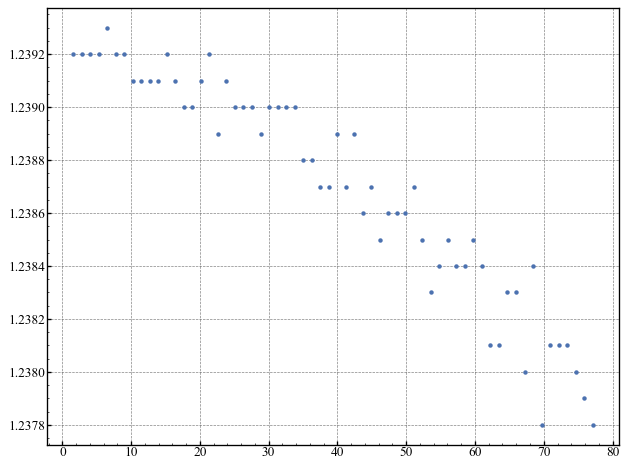

In [4]:
plt.scatter(times, periods)

In [5]:
with open(
    "data/misure fototraguardo, angoli diversi, 3-5-7-10-15 gradi.csv", "r"
) as file:
    data = pd.read_csv(file, delimiter=";", decimal=",").iloc[0:]

1: Params with 1std: ['-1.21e-01±      inf', '-8.36e-02±      inf', ' 7.66e+00±      inf', '-6.39e-07±      inf', '-6.16e+00±      inf', '-3.94e+02±      inf'], 
2: Params with 1std: [' 2.48e+00± 8.54e+04', '-6.10e-03± 4.48e-04', ' 1.79e+01± 1.28e+06', '-2.85e-08± 3.17e-12', '-1.64e+01± 1.28e+06', '-1.37e+03± 3.84e+08'], 
3: Params with 1std: ['-8.62e-01±      inf', '-5.93e-02±      inf', ' 3.30e-01±      inf', '-3.28e-03±      inf', ' 1.50e+00±      inf', '-1.46e+03±      inf'], 
4: Params with 1std: [' 1.67e-02± 2.85e-02', '-5.23e-03± 3.89e-06', '-1.05e+02± 5.61e+05', ' 2.35e-08± 2.56e-14', ' 1.07e+02± 5.61e+05', '-3.00e+02± 3.72e+06'], 
5: Params with 1std: [' 3.87e-02± 2.46e+00', '-5.83e-03± 5.60e-07', '-2.61e+01± 3.67e+05', ' 1.43e-07± 1.10e-11', ' 2.76e+01± 3.67e+05', '-2.70e+02± 4.83e+07'], 


/Users/mattiaballico/Documents/Programmazione/Università/Stima_di_g/Try1/packages/funcs.py:155: OptimizeWarning: Covariance of the parameters could not be estimated
  params, params_cov = optimize.curve_fit(


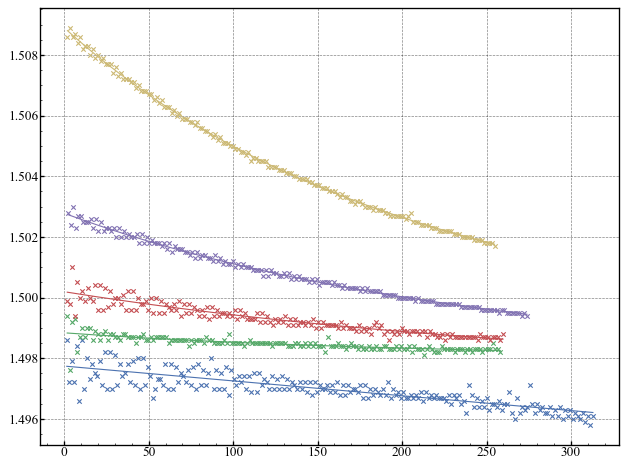

In [6]:
for i in range(0, 10, 2):
    X = data.iloc[:, i].dropna().to_numpy()
    Y = data.iloc[:, i + 1].dropna().to_numpy()
    plt.scatter(X, Y, marker="x")

    params, std_params = Statistics.double_expfit(X, Y)
    print(f"{i//2+1}: Params with 1std: {[f"{param: 9.2e}±{std: 9.2e}" for param, std in zip(params, std_params)]}, ")

    def test_func(x, a, b, c, d, e, phi):
        return a * np.exp(b * (x-phi)) + c * np.exp(d * (x-phi)) + e

    plt.plot(X, test_func(X, *params))